## 텐서 연습

In [2]:
import torch
import numpy as np

In [ ]:
### Basic

In [1]:
a = [1.0, 2.0, 1.0]

In [3]:
a[0]

1.0

In [4]:
# value 바꾸기
a[2] = 3.0
a

[1.0, 2.0, 3.0]

In [5]:
a = torch.ones(3)
a

tensor([1., 1., 1.])

In [6]:
float(a[1])

1.0

In [7]:
a[2] = 2.0
a

tensor([1., 1., 2.])

---------------------------------------------------------------------------------------------------------------

In [13]:
points = torch.zeros(6)
points[0] = 4.0
points[1] = 1.0
points[2] = 5.0
points[3] = 3.0
points[4] = 2.0
points[5] = 1.0
points

tensor([4., 1., 5., 3., 2., 1.])

In [14]:
points = torch.tensor([4.0, 1.0, 5.0, 3.0, 2.0, 1.0])
points

tensor([4., 1., 5., 3., 2., 1.])

In [15]:
float(points[0]), float(points[1])

(4.0, 1.0)

---------------------------------------------------------------------------------------------------------------

In [18]:
points = torch.zeros(3,2)
points

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

---------------------------------------------------------------------------------------------------------------

In [19]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [20]:
points.shape

torch.Size([3, 2])

In [21]:
points[0, 1]

tensor(1.)

In [22]:
points[0]

tensor([4., 1.])

---------------------------------------------------------------------------------------------------------------

### storage()
- 메모리에서 어떤 순서로 저장되어있는지 확인

In [31]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])

In [32]:
points.storage()

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]

In [33]:
points_storage = points.storage()

In [34]:
points_storage[0]

4.0

In [35]:
points_storage[1]

1.0

In [36]:
# value change
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_storage = points.storage()
points_storage[0] = 2.0
points

tensor([[2., 1.],
        [5., 3.],
        [2., 1.]])

---------------------------------------------------------------------------------------------------------------

### Offset & Stride & Size
- Offset : storage 공간에서 얼마나 떨어져있는지
- Stride : 다음칸으로 넘어갈 때 칸 수

In [48]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]

In [49]:
second_point.storage_offset()

2

In [45]:
second_point.size()

torch.Size([2])

In [43]:
second_point.shape

torch.Size([2])

In [46]:
points.stride()

(2, 1)

In [50]:
second_point.stride()

(1,)

---------------------------------------------------------------------------------------------------------------

### Clone
- original data는 변경되지 않는다.

In [51]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
second_point[0] = 10.0
points

tensor([[ 4.,  1.],
        [10.,  3.],
        [ 2.,  1.]])

In [53]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1].clone()
second_point[0] = 10.0
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

---------------------------------------------------------------------------------------------------------------

### Transpose

In [59]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [60]:
points_t = points.t()
points_t

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [61]:
id(points.storage()) == id(points_t.storage())

False

In [62]:
points.stride()

(2, 1)

In [63]:
points_t.stride()

(1, 2)

In [64]:
some_t = torch.ones(3, 4, 5)
transpose_t = some_t.transpose(0, 2)

In [65]:
some_t.shape

torch.Size([3, 4, 5])

In [66]:
transpose_t.shape

torch.Size([5, 4, 3])

In [67]:
some_t.stride()

(20, 5, 1)

In [68]:
transpose_t.stride()

(1, 5, 20)

---------------------------------------------------------------------------------------------------------------

### is_contiguous()
- 연속적인 메모리 텐서를 반환하는 메서드로 만약 어떤 연산을 사용할때 이를 사용하지 않으면 에러가 발생하는 경우가 생긴다.

In [71]:
points.is_contiguous()

True

In [72]:
points_t.is_contiguous()

False

In [73]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_t = points.t()
points_t

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [74]:
points_t.storage()

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]

In [75]:
points_t.stride()

(1, 2)

In [76]:
points_t_cont = points_t.contiguous()
points_t_cont

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [77]:
points_t_cont.stride()

(3, 1)

In [78]:
points_t_cont.storage()

 4.0
 5.0
 2.0
 1.0
 3.0
 1.0
[torch.FloatStorage of size 6]

---------------------------------------------------------------------------------------------------------------

### Numeric types
- Tensor도 numpy array의 dtype argument처럼 numerical data type을 가진다.

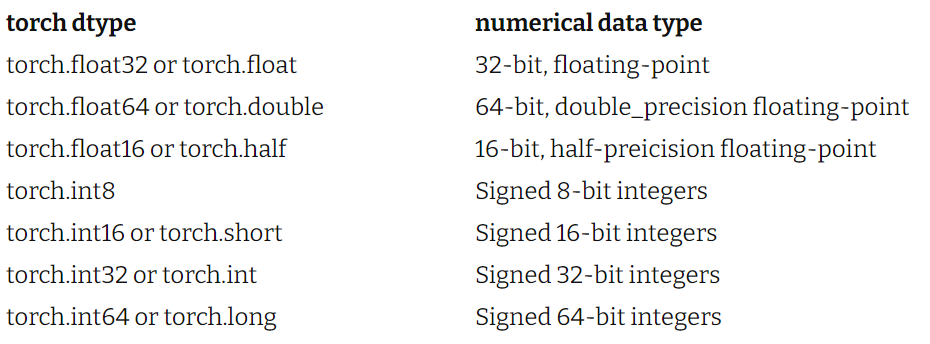

In [86]:
from IPython.display import Image
Image("numeric_type.PNG")

In [79]:
double_points = torch.ones(10, 2, dtype=torch.double)
short_points = torch.tensor([[1, 2], [3, 4]], dtype=torch.short)

In [80]:
short_points.dtype

torch.int16

In [81]:
points_64 = torch.rand(5, dtype=torch.double)
points_short = points_64.to(torch.short)
points_64 * points_short

tensor([0., 0., 0., 0., 0.], dtype=torch.float64)

In [82]:
points_64

tensor([0.0775, 0.7647, 0.4637, 0.1654, 0.3140], dtype=torch.float64)

In [83]:
points_short

tensor([0, 0, 0, 0, 0], dtype=torch.int16)

---------------------------------------------------------------------------------------------------------------

### Indexing tensors
-  Tensor는 python의 기본 list처럼 index들을 slicing 할 수 있다. 
- range를 사용함으로써 PyTorch도 강력한 indexing을 가지며 이를 advanced indexing이라고 한다.

In [106]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])

In [90]:
some_list = list(range(6))

In [91]:
some_list[:]

[0, 1, 2, 3, 4, 5]

In [92]:
some_list[1:4]

[1, 2, 3]

In [93]:
some_list[1:]

[1, 2, 3, 4, 5]

In [94]:
some_list[:4]

[0, 1, 2, 3]

In [98]:
some_list[:-1]

[0, 1, 2, 3, 4]

In [105]:
some_list[1:4:2]

[1, 3]

In [107]:
points[1:]

tensor([[5., 3.],
        [2., 1.]])

In [108]:
points[1:, :]

tensor([[5., 3.],
        [2., 1.]])

In [109]:
points[1:, 0]

tensor([5., 2.])

In [110]:
points[None]

tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]])

---------------------------------------------------------------------------------------------

### Numpy interoperability
-  PyTorch의 tensor는 Numpy array로 변환될 수 있어서 Numpy 배열을 중심으로 구축된 더 넓은 Python ecosystem의 방대한 기능들을 효율적으로 사용할 수 있다. 
- 그리고 Numpy array는 Python buffer protocol이 작동하는 storage system덕분에 zero-copy interoperability가 가능하다.


In [115]:
points = torch.ones(3, 4)
points_np = points.numpy()
points_np

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

- Numpy array에서 PyTorch tensor로 바꾸는 것은 다음과 같다.

In [111]:
points = torch.from_numpy(points_np)

In [112]:
points.dtype

torch.float32

--------------------------------------------------------

### Seriallizing tensors

In [ ]:
""" Saving points """
torch.save(points, '../data/ourpoints.t')

# or

with open('./data/ourpoints.t', 'wb') as f:
    torch.save(points. f)

""" Loading points back """
points = torch.load('./data/ourpoints.t')

# or

with open('./data/ourpoitns.t', 'rb') as f:
    points = torch.load(f)